In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# import the dataset
dataset = pd.read_csv('Wine.csv')
# distributing the dataset into two components into X and Y
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
X = dataset.iloc[:,0:13].values
Y = dataset.iloc[:,13].values

In [4]:
#split the  X and Y into training and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [5]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

142
36
142
36


In [6]:
#Applying PCA to the training dataset
from sklearn.decomposition import PCA
pca =  PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.98985858e-01, 9.14741184e-04])

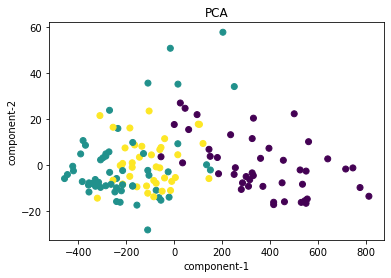

In [7]:
plt.title("PCA")
plt.xlabel("component-1")
plt.ylabel("component-2")
plt.scatter(X_train[:,0],X_train[:,1],c = y_train)
plt.show()

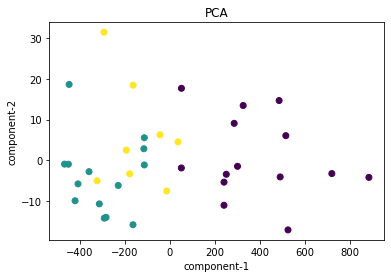

In [8]:
plt.title("PCA")
plt.xlabel("component-1")
plt.ylabel("component-2")
plt.scatter(X_test[:,0],X_test[:,1],c = y_test)
plt.show()

In [9]:
#fitting LogisticRegression into the training dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [10]:
# Predicting the test set result using predict function under LogisticRegression
y_predict = classifier.predict(X_test)

In [11]:
# making confusion matrix between test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)

In [16]:
 # Visualising the results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

MemoryError: Unable to allocate 8.34 GiB for an array with shape (8809, 127111) and data type float64

In [18]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    

# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()


MemoryError: Unable to allocate 5.13 GiB for an array with shape (5072, 135717) and data type float64